# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import warnings

import imageio  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append("../modules")
import plot_clustering as plt_cp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import smoothing_particles as sp  # type: ignore
import track_particles as tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_3m_0f_230522_1"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [80, 1840]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv(
    "{}/clustered_{}.csv".format(output_path, video_name), low_memory=False
)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,80.963613,660.129269,82.713296,664.418204,NaN,80.963613,660.129269,NaN,80.963613,660.129269,-0.376469,6266.0,185.368949,78.190270,0.906685,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,245.672559,705.787974,246.479345,702.985652,NaN,245.672559,705.787974,NaN,245.672559,705.787974,-0.738464,8881.0,220.456627,92.581731,0.907545,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,128.580205,967.699039,137.312847,974.609538,NaN,128.580205,967.699039,NaN,128.580205,967.699039,-1.051289,12387.0,270.782792,82.682335,0.952242,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
90000,0,90000,357.353970,390.313052,358.303998,394.216489,NaN,357.354321,390.312658,NaN,357.353912,390.312999,1.458511,3180.0,106.280151,61.282276,0.817019,3,3.0,0.0,0.0,0.0,False,False,False
90001,1,90000,543.867309,335.916656,547.487222,335.310447,0.0,514.639578,249.983205,0.639216,527.863060,250.639377,-0.350884,219.0,155.108943,66.126650,0.904571,3,3.0,0.0,0.0,0.0,False,False,False
90002,2,90000,449.734912,308.932178,448.833309,309.478553,NaN,514.639578,249.983205,NaN,467.596842,331.312951,-1.167935,8197.0,162.714457,77.878078,0.878023,3,3.0,0.0,0.0,0.0,False,False,False


## Swapping mixed IDs

In [5]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 40000, velocity_threshold, omega_threshold, True],
    [40000, 50000, velocity_threshold, omega_threshold, True],
    [50000, 60000, velocity_threshold, omega_threshold, True],
    [60000, 70000, velocity_threshold, omega_threshold, True],
    [70000, 80000, velocity_threshold, omega_threshold, True],
    [80000, 90000, velocity_threshold, omega_threshold, True],
    [90000, 100000, velocity_threshold, omega_threshold, True],
    [100000, 108311, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|███████████████████████| 11/11 [00:31<00:00,  2.86s/it]


Time: 30000 Chunks 2 Allowed time 30000 Permutation [0 1 2]
Time: 60000 Chunks 2 Allowed time 60000 Permutation [0 1 2]
Time: 90000 Chunks 2 Allowed time 90000 Permutation [0 1 2]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,80.963613,660.129269,82.713296,664.418204,NaN,80.963613,660.129269,NaN,80.963613,660.129269,-0.376469,-0.376469,6266.0,185.368949,78.190270,0.906685,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,245.672559,705.787974,246.479345,702.985652,NaN,245.672559,705.787974,NaN,245.672559,705.787974,-0.738464,-0.738464,8881.0,220.456627,92.581731,0.907545,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,128.580205,967.699039,137.312847,974.609538,NaN,128.580205,967.699039,NaN,128.580205,967.699039,-1.051289,-1.051289,12387.0,270.782792,82.682335,0.952242,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_10000,0,0,81.343995,660.546533,83.247888,665.215300,NaN,81.343995,660.546533,NaN,81.343995,660.546533,-0.376469,-0.376469,6266.0,185.368949,78.190270,0.906685,3,3.0,0.126794,0.139088,0.0,False,False,False
4,True,3,chunk_00000_10000,1,1,245.672559,705.787974,246.479345,702.985652,NaN,245.672559,705.787974,NaN,245.672559,705.787974,-0.738464,-0.738464,8881.0,220.456627,92.581731,0.907545,3,3.0,0.000000,0.000000,0.0,False,False,False
5,True,3,chunk_00000_10000,2,2,128.560837,967.687079,137.293137,974.582146,NaN,128.560837,967.687079,NaN,128.560837,967.687079,-1.051289,-1.051289,12387.0,270.782792,82.682335,0.952242,3,3.0,-0.006456,-0.003987,0.0,False,False,False
6,True,6,chunk_00000_10000,0,0,81.333298,660.521966,83.297353,665.357750,NaN,81.333298,660.521966,NaN,81.333298,660.521966,-0.376469,-0.376469,6266.0,185.368949,78.190270,0.906685,3,3.0,-0.003566,-0.008189,0.0,False,False,False
7,True,6,chunk_00000_10000,1,1,245.672559,705.787974,246.479345,702.985652,NaN,245.672559,705.787974,NaN,245.672559,705.787974,-0.738464,-0.738464,8881.0,220.456627,92.581731,0.907545,3,3.0,0.000000,0.000000,0.0,False,False,False


In [6]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
89997,True,89997,chunk_80000_90000,0,1,357.353970,390.313052,358.303998,394.216489,NaN,357.354321,390.312658,NaN,357.353912,390.312999,1.458511,-1.458511,3180.0,106.280151,61.282276,0.817019,3,3.0,0.0,0.0,0.0,False,False,False
89998,True,89997,chunk_80000_90000,1,2,543.867309,335.916656,547.487222,335.310447,0.0,514.639578,249.983205,0.639216,527.863060,250.639377,-0.350884,-0.350884,219.0,155.108943,66.126650,0.904571,3,3.0,0.0,0.0,0.0,False,False,False
90002,True,90000,chunk_80000_90000,2,0,449.734912,308.932178,448.833309,309.478553,NaN,514.639578,249.983205,NaN,467.596842,331.312951,-1.167935,-1.167935,8197.0,162.714457,77.878078,0.878023,3,3.0,0.0,0.0,0.0,False,False,False
90000,True,90000,chunk_80000_90000,0,1,357.353970,390.313052,358.303998,394.216489,NaN,357.354321,390.312658,NaN,357.353912,390.312999,1.458511,-1.458511,3180.0,106.280151,61.282276,0.817019,3,3.0,0.0,0.0,0.0,False,False,False
90001,True,90000,chunk_80000_90000,1,2,543.867309,335.916656,547.487222,335.310447,0.0,514.639578,249.983205,0.639216,527.863060,250.639377,-0.350884,-0.350884,219.0,155.108943,66.126650,0.904571,3,3.0,0.0,0.0,0.0,False,False,False


## Interpolation over not allowed frames

In [7]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:, "permuted_id"] == df_full["permuted_id"].unique()[id_]
        df_full[mask] = df_full[mask].interpolate(method="linear")

In [8]:
if ordering:
    cols = [
        "id",
        "permuted_id",
        "time",
        "position_x",
        "position_y",
        "weighted_x",
        "weighted_y",
        "darkest_v",
        "darkest_x",
        "darkest_y",
        "lightest_v",
        "lightest_x",
        "lightest_y",
        "orientation",
        "corrected_orientation",
        "area",
        "axis_major",
        "axis_minor",
        "eccentricity",
    ]
    df_temp = df_full[cols]
    df_temp.to_csv(
        "{}/interpolated_{}.csv".format(output_path, video_name), index=False
    )
    df_temp

Thresholds:
	- Velocity: 23.00641266821166 
	- Angle: 6.804335748337 



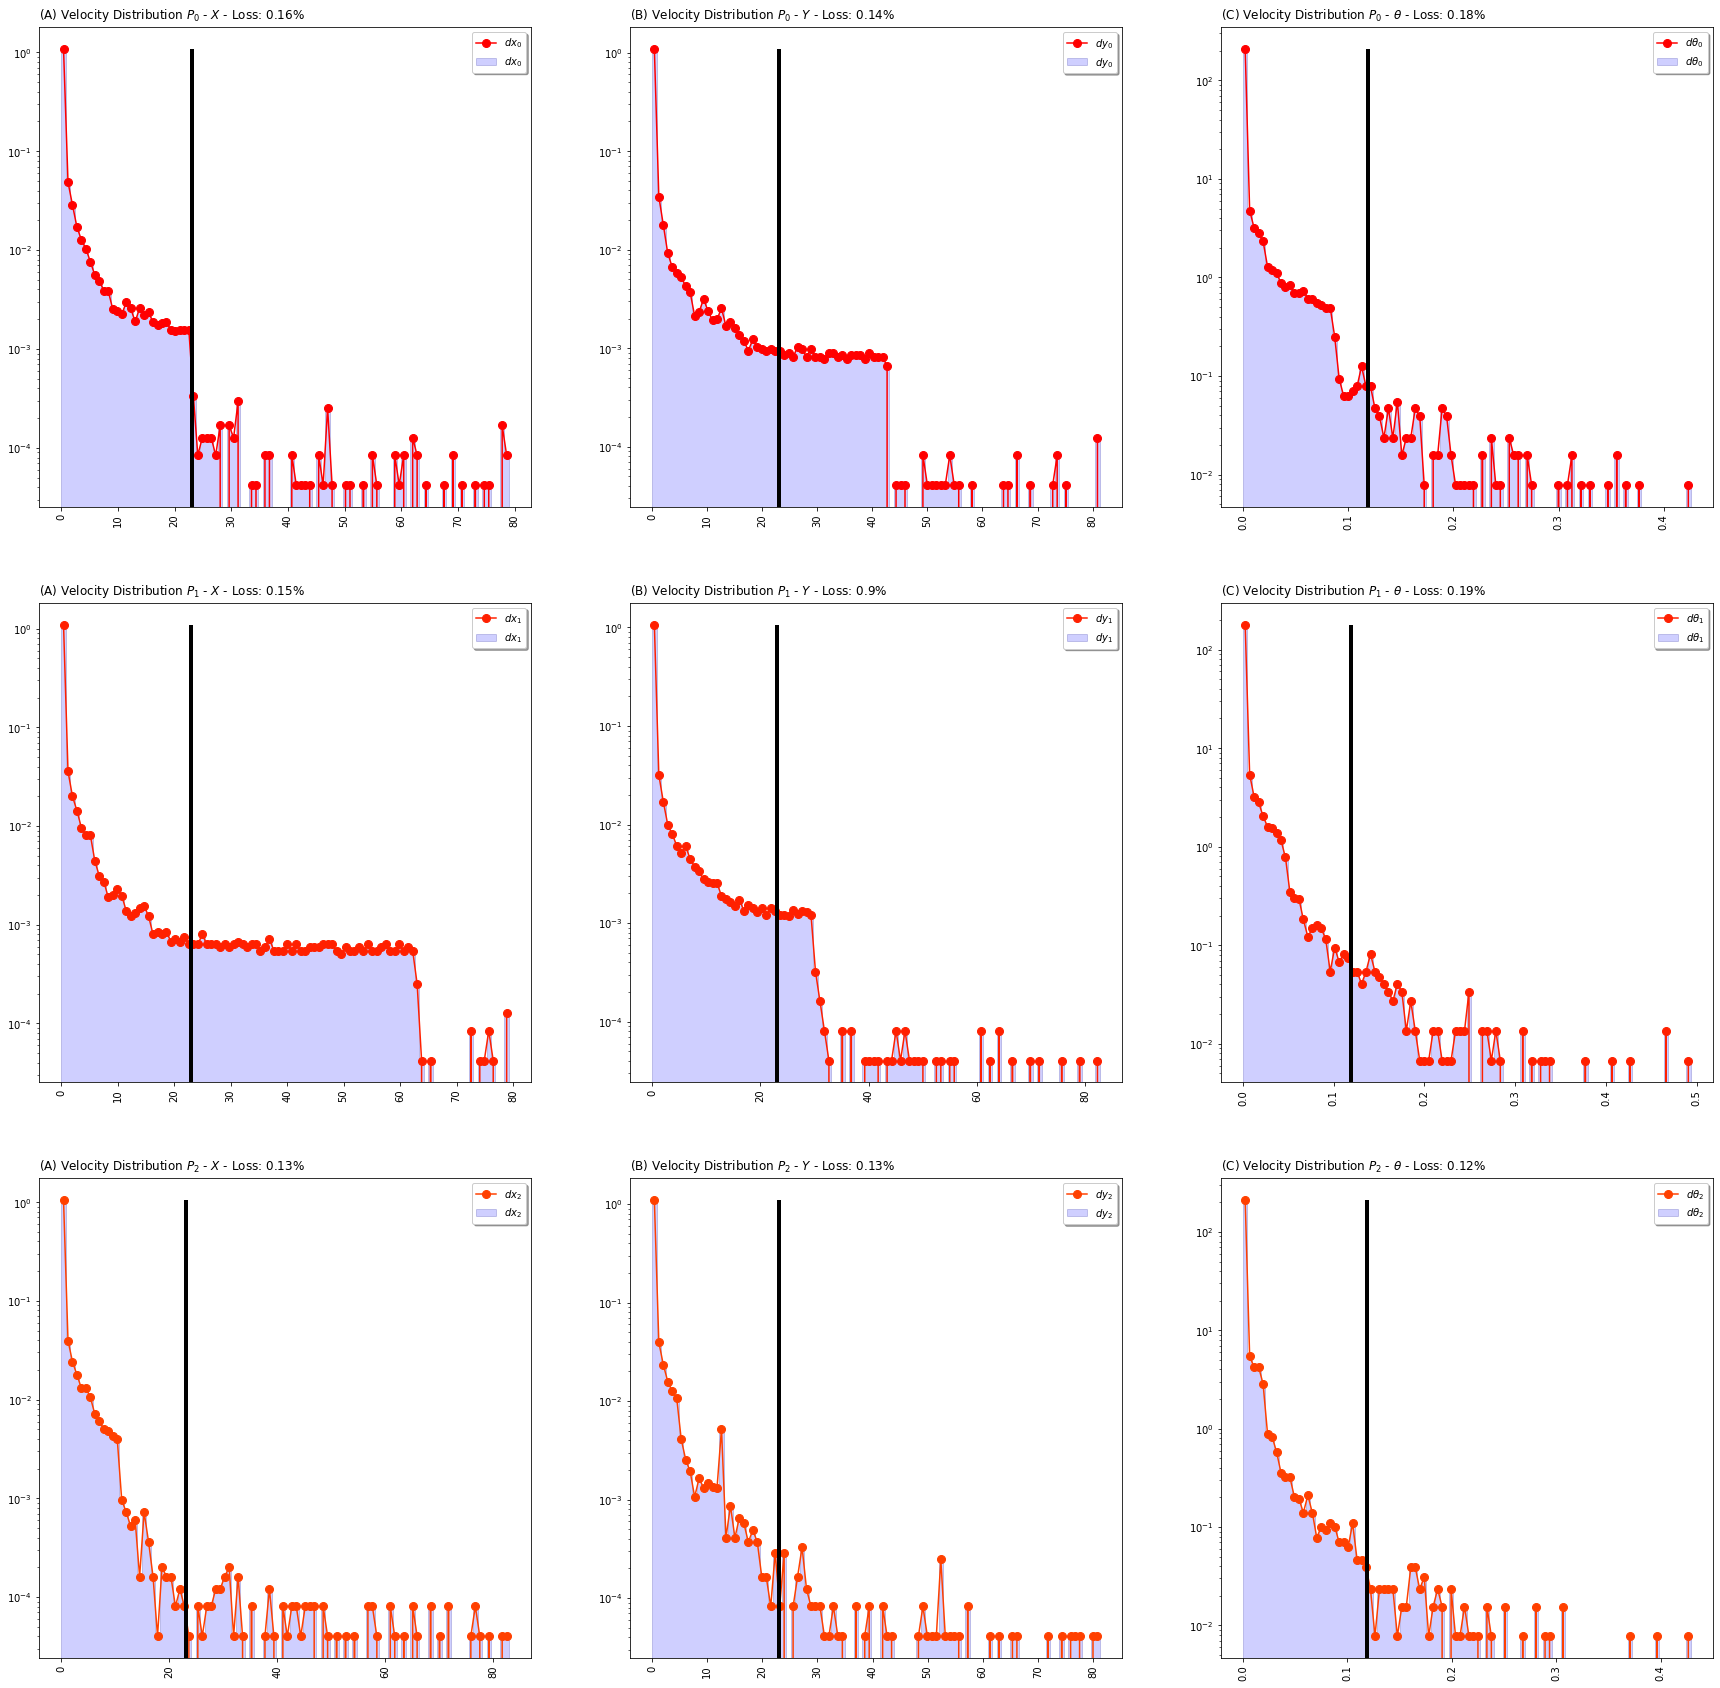

In [9]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = (
        df_full["velocity_orientation"].abs().quantile(0.9965)
    )  # Angular velocity per frame
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9901)
    )  # Velocity per frame limited with half average size of particle
    print(
        "Thresholds:\n\t- Velocity:",
        velocity_threshold,
        "\n\t- Angle:",
        omega_threshold * 180 / np.pi,
        "\n",
    )

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend,
    )

In [ ]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9701)
    )  # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

Original
